## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [2]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [5]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

9002


In [6]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


/content/drive/MyDrive/Mask_Dataset/without_mask
/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect
/content/drive/MyDrive/Mask_Dataset/with_mask
[3014, 2994, 2994]


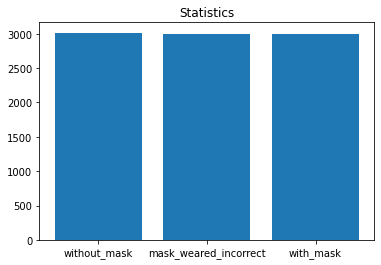

In [7]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  print(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

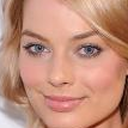

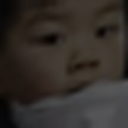

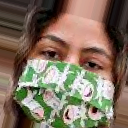

In [8]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  # lets say we want to show the image at index 7 in every class list
  img_show = this_path + '/' + im_count[7]
  img = cv2.imread(img_show)
  cv2_imshow(img)

In [9]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print(img.shape)
image_shape = img.shape
# print(image_shape)



(128, 128, 3)


In [10]:
# Check if all the images have same shape, else you need to resize them to some common size
# I have created a list which stores the sizes of all the images. 
# In order to check for different shapes, we will count the unique shapes present in the list
combined_images_shape = []
dict 
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count = os.listdir(dir)

  for i in im_count:
    img_show = this_path + '/' + i
    img = cv2.imread(img_show)
    combined_images_shape.append(img.shape)  

print(combined_images_shape)
print(len(combined_images_shape))



[(128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128

In [11]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
# counted the number of unique shapes present in the above list

from collections import Counter
items = Counter(combined_images_shape).keys()
if len(items)==1:
  print(f"The size of all the images is  :  {items}")
else:
  print(f"The size of all the images are not same")


The size of all the images is  :  dict_keys([(128, 128, 3)])


### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [12]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential


In [13]:
# Choose and define base model
# In this step we are going to import the VGG16 architecture from keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
# include_top is false because we don't need to import whole architecture.
# We need only the Convolutional architecture of VGG16. After that we will add our layer and which will be trained according to our dataset.
vgg16 = VGG16(input_shape=image_shape, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
# Print base model summary and have a look at the layers
vgg16.summary()
# here if we see the last layer, i.e prediction layer, we can see that this model can predict from 1000 class. 
# but here we dont need 1000 class as we only have 3 class

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [15]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
# here I will choose to free all the layer except the last layer named as predictions.
# here as you can see above we are having Trainable parameters as  14,714,688. What we want is to freeze them so that 
# while doing back propagation they dont get changed

for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [16]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
# Now we need to add some more trainable layer which will be trained according to our dataset
flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)


In [17]:
# Add the final output layer
dense_output = Dense(units=3, activation='sigmoid')(dense_4)
model = Model(inputs=vgg16.input, outputs=dense_output)


In [18]:
# Print your model's summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [19]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [20]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2)
                                      
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Your code 


### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [21]:
# Your code
# image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                          
                                                 target_size=(128, 128), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                                 
                                                 target_size=(128,128), 
                                                 subset="validation",
                                                 class_mode='categorical')



Found 7204 images belonging to 3 classes.
Found 1798 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [22]:
from keras.callbacks import ModelCheckpoint

r = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=20,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(validation_dataset)
)


Epoch 1/20
226/226 [==============================] - 37s 99ms/step - loss: 0.2020 - accuracy: 0.9207 - val_loss: 0.1360 - val_accuracy: 0.9488
Epoch 2/20
226/226 [==============================] - 20s 89ms/step - loss: 0.0782 - accuracy: 0.9725 - val_loss: 0.1400 - val_accuracy: 0.9494
Epoch 3/20
226/226 [==============================] - 20s 90ms/step - loss: 0.0637 - accuracy: 0.9764 - val_loss: 0.0807 - val_accuracy: 0.9761
Epoch 4/20
226/226 [==============================] - 20s 90ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.0719 - val_accuracy: 0.9794
Epoch 5/20
226/226 [==============================] - 20s 90ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0818 - val_accuracy: 0.9744
Epoch 6/20
226/226 [==============================] - 20s 90ms/step - loss: 0.0232 - accuracy: 0.9915 - val_loss: 0.0610 - val_accuracy: 0.9828
Epoch 7/20
226/226 [==============================] - 21s 93ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.1116 - val_accuracy:

### Evaluate the performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


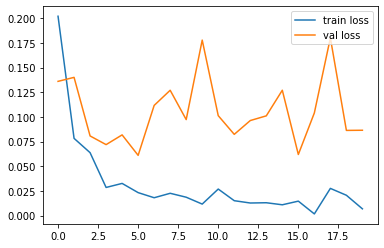

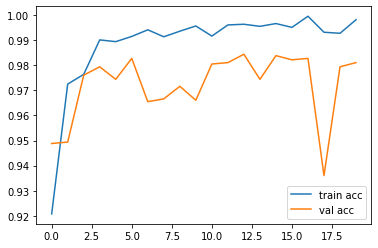

In [23]:
# Plot training & validation loss/accuracy values
print(r.history.keys())
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

import itertools
import numpy as np


validation_classes = []
validation_images = []
for i in range( -(-validation_dataset.samples // validation_dataset.batch_size)):
   batch = validation_dataset.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)


print(classification_report(validation_classes, y_pred, 
		target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))


                       precision    recall  f1-score   support

         without_mask       0.98      1.00      0.99       598
mask_weared_incorrect       0.98      0.97      0.98       598
            with_mask       0.99      0.97      0.98       602

             accuracy                           0.98      1798
            macro avg       0.98      0.98      0.98      1798
         weighted avg       0.98      0.98      0.98      1798

